In [25]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [26]:
heart=pd.read_csv("heart_disease.csv")

In [27]:
heart.columns

Index(['Unnamed: 0', 'age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg',
       'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'present'],
      dtype='object')

In [28]:
heart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  303 non-null    int64  
 1   age         303 non-null    int64  
 2   sex         303 non-null    int64  
 3   cp          303 non-null    int64  
 4   trestbps    303 non-null    int64  
 5   chol        303 non-null    int64  
 6   fbs         303 non-null    int64  
 7   restecg     303 non-null    int64  
 8   thalach     303 non-null    int64  
 9   exang       303 non-null    int64  
 10  oldpeak     303 non-null    float64
 11  slope       303 non-null    int64  
 12  ca          303 non-null    object 
 13  thal        303 non-null    object 
 14  present     303 non-null    int64  
dtypes: float64(1), int64(12), object(2)
memory usage: 35.6+ KB


In [29]:
heart.head()

,Unnamed: 0,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,present
0,1,63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0,0
1,2,67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0,1
2,3,67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0,1
3,4,37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0,0
4,5,41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0,0


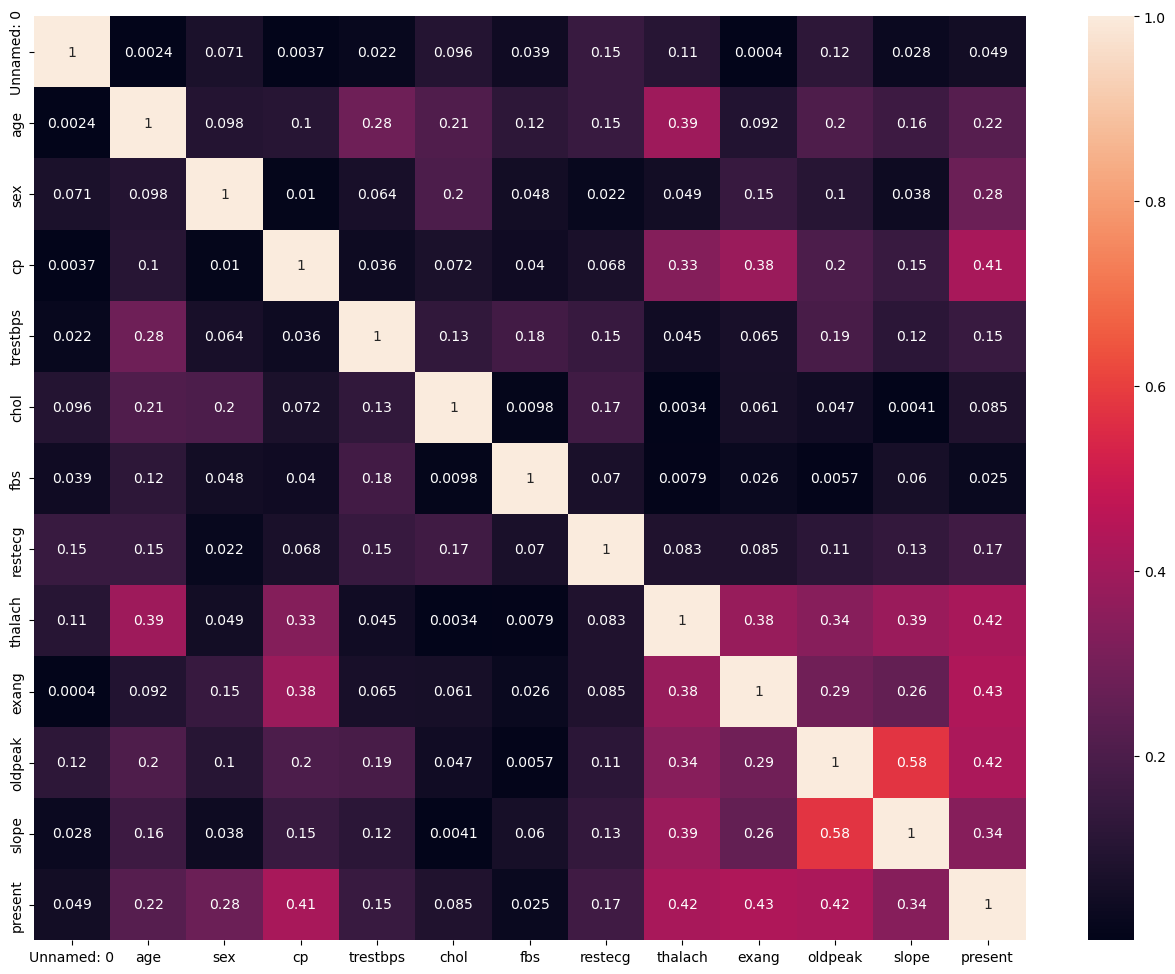

In [30]:
df_corr=abs(heart.corr())
plt.figure(figsize=(16,12))
sns.heatmap(df_corr, annot=True)
plt.show()

Looking at the correlation the best predictors for the variable present are: age, sex, cp, thalach, exang, oldpeak and slope.

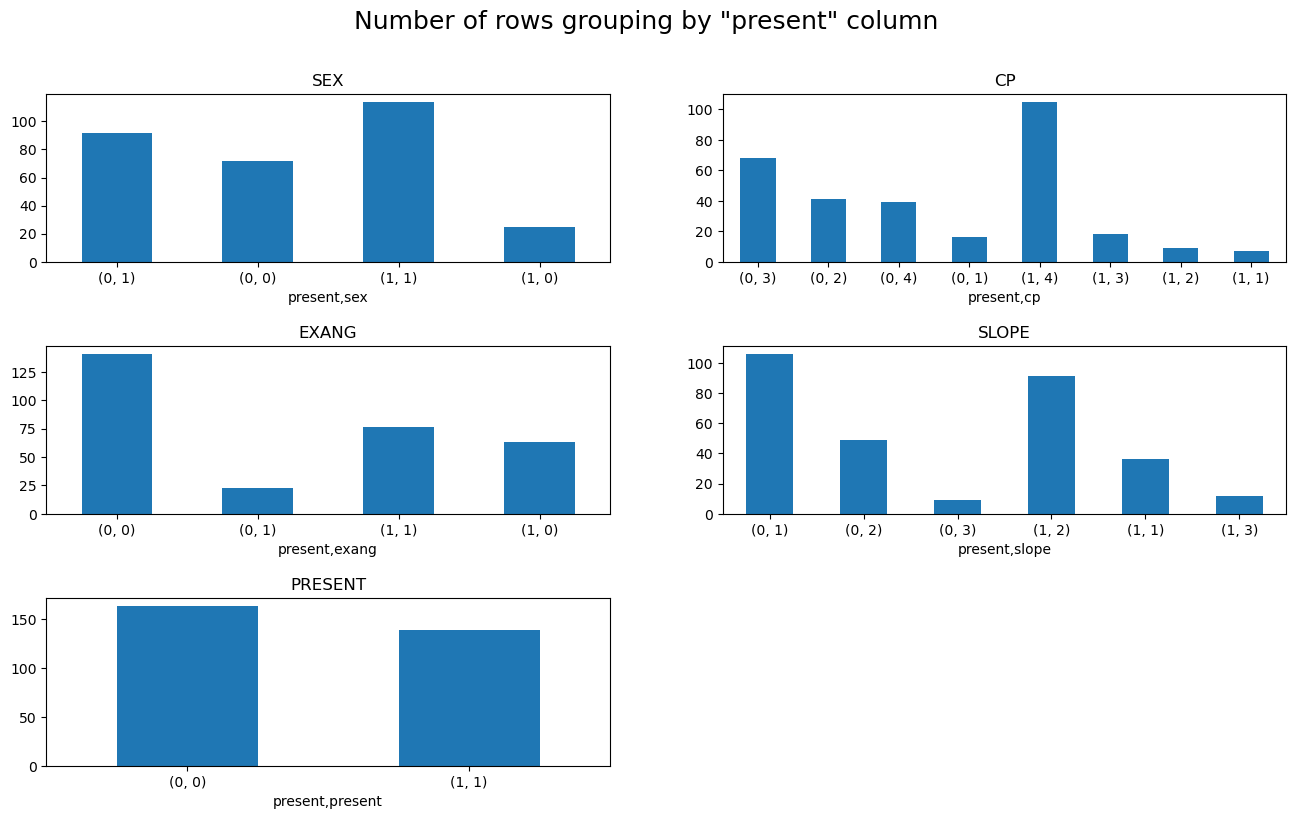

In [31]:
sub_heart=heart[["sex","cp", "exang", "slope", "present"]]
plt.figure(figsize=(16,12))
plt.subplots_adjust(hspace=0.5)
plt.suptitle('Number of rows grouping by "present" column', fontsize=18, y=0.95)
for i, value in enumerate(sub_heart):
    ax= plt.subplot(4,2, i+1)
    sub_heart.groupby("present")[value].value_counts().plot.bar(ax=ax)
    ax.tick_params(labelrotation=0)
    ax.set_title(value.upper())

The legend. 
Sex:1 for male and 0 for female; 
CP:
-- Value 1: typical angina
-- Value 2: atypical angina
-- Value 3: non-anginal pain
-- Value 4: asymptomatic;
Exang: 1 is yes and 0 is no;
Slope:
-- Value 1: upsloping
-- Value 2: flat
-- Value 3: downsloping;
Present: 1 is yes and 0 is no;

The predictors will be using are the one selected the highest correlation. 

In [32]:
X=heart[["age","sex","cp", "exang", "thalach"]]
y=heart["present"]
X_train, X_test, y_train, y_test= train_test_split(X,y, test_size=0.2,random_state=417)

In [33]:
y_train.value_counts(normalize=True)

0    0.566116
1    0.433884
Name: present, dtype: float64

In [34]:
y_test.value_counts(normalize=True)

1    0.557377
0    0.442623
Name: present, dtype: float64

In [35]:
log_m=LogisticRegression()
log_m.fit(X_train, y_train)

LogisticRegression()

In [36]:
accuracy=log_m.score(X_train, y_train)
accuracy

0.8181818181818182

In [37]:
prediction=log_m.predict(X_train)
tp=sum((y_train==1) & (prediction==1))
fn=sum((y_train==1) & (prediction ==0))
sensitivity= tp/(tp+fn)
sensitivity

0.7523809523809524

In [38]:
tn=sum((y_train==0) & (prediction==0))
fp=sum((y_train==0) & (prediction ==1))
specificity= tn/(tn+fp)
specificity

0.8686131386861314

The accuracy, the specificity and the sensitivity are high. 

In [39]:
log_coef=log_m.coef_[0]
log_coef

array([ 0.04399065,  1.68664437,  0.81759798,  1.34511365, -0.02484689])

In [40]:
odd_coef=np.exp(log_coef)
odd_coef

array([1.04497259, 5.40132539, 2.2650526 , 3.83862276, 0.97545925])

Higher the age there is more likelihood of an heart disease (but the value is near 1). Male seems too have an higher likelihood to have a heart disease. The number of colored vessels are associeted with an higher likelihood as well as exang. Although, higher thalach is associeted with a lower odd ration for heart disease (even though is close to 1).

In [41]:
predictions_t=log_m.predict(X_test)
accuracy_test=log_m.score(X_test, y_test)
accuracy_test

0.7213114754098361

In [42]:
tp_t=sum((y_test==1) & (predictions_t==1))
fn_t=sum((y_test==1) & (predictions_t==0))
sensitivity_t=tp_t/(tp_t+fn_t)
sensitivity_t

0.7647058823529411

In [43]:
tn_t=sum((y_test==0) & (predictions_t==0))
fp_t=sum((y_test==0) & (predictions_t==1))
specificity_t=tn_t/(tn_t+fp_t)
specificity_t

0.6666666666666666

Looking at the values of the accuracy for the test set this is a bit lower than the one calculated with the training set. But a value of 0.72 is still acceptable. The sensisity shows a higher value compared to the training one. Looking at the specificity, the value is 0.20 less than the training one and this is too low (0.67). This could be a problem if the heart disease is not present.  

Also, considering the features we used the model seems make sense looking at the odds